# Introduction
This is a Python tutorial for established (and impatient) R data analysts. If you are already comfortable with Data Analysis/Science in R, and want to add Python to your toolbox, it can be difficult to find a tutorial that will get you started quickly and efficiently. Most tutorials out there either assume you have very limited programming experience or are oriented toward established programmers but include far more than you need to know to get started on a data anlaysis problem. Folks who have been doing analysis in R for years probably don't need to spend 30 minutes on basic data types and loop structures. They just need to know Python's specific syntax and quirks. Data scientists also probably don't (initially) need to know all the ins and outs of writing an X, Y, or Z in Python. They just want to know how to read a file into the pandas data format and where to find a good regression (or ML or clustering etc.) library.

This tutorial rifs off Trevor Stephens' excellent Kaggle Titanic walkthrough, and along the way shows how R concepts translate into Python. 

### Disclaimer
This author is releatively new to Python. There are likely better ways to do some of the things I will show you. I will be updating this tutorial as I learn more myself.

# Setup
## or What is the Equivalent of RStudio in Python
When you are setting up a new machine for analysis in R, you typically download and install the R kernel, RStudio, and then install a slew of common packages from CRAN. For Python, just download and install Anaconda. this will give you the Python interpreter, the Jupyter notebook interface, and a very long list of analysis libraries. Here's a quick recap:

R | Python
---|---
R interpreter | Python interpreter^a^
RStudio | Jupyter notebook^a^
dplyr + tidyr | pandas^a^
ggplot2 + Rcolorbrewer | matplotlib + seaborn + (whatelse?)^a^
(analysis package?) | (analysis package?)^a^^b^

a - all included in the Anaconda distribtuion of Python
b - With the default settings, installing new Python packages, so that they are available to the interpreter, requires Administrator privaleges in Windows. If this is an issue in your setting, there are some potential workarounds out there on the web. Luckily, everything you need to get started with Data Science in Python is already incdlued in Anaconda - admin once and done.

# Python quirks
## Basic Syntax
Category | R | Python
---|---|---
Comments | # | #
Assignment | <- | =
Equality | == | ==
Control Blocks | {} | Indentation
Loading Pacakges | library(pkg_x) | import pkg_x as alias_x


## Basic Data Structures
In addition to your usual primatives (int, float, str, bool), Python uses lists and the related dicts. Lists and dicts are somewhat like lists and dataframes in R. The pandas library in Python, which borrows many concepts from dplyr, makes the comparison even closer.

## Factors
anything to say here?

## Referencing versus Assignment
The distincting between referencing a list and assigning a new list is perhaps the most important thing to keep in mind when using Python to analyze data. Unlike R, which creates a new copy of your variable almost everytime you operate on that variable [link to advanced R explanation], Python defaults to pointing to the location of a list variable in memory and only operating on that one copy. This is far more efficient in terms of memory usage, but can lead to unexpected results. 

To create a new copy of a list, copy the contents of the list to a new variable like so

In [3]:
x = [1, 2, 3] #first list variable
y = x[:] #new, second list variable with same content as x
z = x #pointer back to x

Lets demonstrate the difference between x, y and z:

In [4]:
print(x, y, z) #initial values in each variable
y[1] = "a" #change y
print(x, y, z) #note change in y
z[2] = "z"
print(x, y ,z) #note change in z AND x

[1, 2, 3] [1, 2, 3] [1, 2, 3]
[1, 2, 3] [1, 'a', 3] [1, 2, 3]
[1, 2, 'z'] [1, 'a', 3] [1, 2, 'z']


## Object Oriented Programing
Python also relies heavily on object oriented programming. You can spend years working in R and never have to worry about this concept.

# Titanic Walkthrough
Trevor Stephens' original: http://trevorstephens.com/kaggle-titanic-tutorial/getting-started-with-r/

## Step 1: Load the Training Data
Compared to all of the settings you need to check with read.delim in R, loading data into pandas is ridiculously easy:

In [5]:
import os
import pandas as pd
os.chdir("O:\\PDES\\PRISM\\Sullivan\\Kaggle\\Titanic") #make sure we're looking in the right place
dta_train = pd.read_csv("train.csv")
print(dta_train.head()) #look at the first few rows

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Getting to know the training data
DataFrames have an index (aka row names) and column names. Values can be retrieve using the index and column name via the "loc" proprety, or they can be retrieved by position (0-indexed) using the "iloc" property. Good summary here: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python#question2


In [6]:
#Simple Example
import numpy as np
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index= [2, 'A', 4], columns=[48, 49, 50])
print(df)
#these should all select the element in the first row, second column
print(df.iloc[0,1])
#print(df.iloc[0][1]) #this doesn't work, although several tutorials suggest that it should
print(df.loc[2][49])
print(df.loc[2,49])

   48  49  50
2   1   2   3
A   4   5   6
4   7   8   9
2
2
2


In [7]:
#Seleccting entire rows or columns
#to get the entire PassengerId column use either
print(dta_train.iloc[:,0]) #position based
#or 
print(dta_train.loc[:,'PassengerId']) #label based
#as with the simple example above, loc will work using the 2-bracket syntax: df.loc[:]['A'] but iloc will not work with df.iloc[:][0]

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
      ... 
861    862
862    863
863    864
864    865
865    866
866    867
867    868
868    869
869    870
870    871
871    872
872    873
873    874
874    875
875    876
876    877
877    878
878    879
879    880
880    881
881    882
882    883
883    884
884    885
885    886
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64
0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      2

## Step 2: Preparing Data
Unlike R, pandas will not automatically create factors out of string variables. 


## Step 2.1 :Visualizing Data
To show the histogram of passenger class versus survival in matplotlib we would need to create an overlaid_histogram - essentially one histogram for the survived = 1 population and one histogram for the survived = 0 population. This is not nearly as friendly as just specifying the color grouping in ggplot. But seaborn can rescue us.

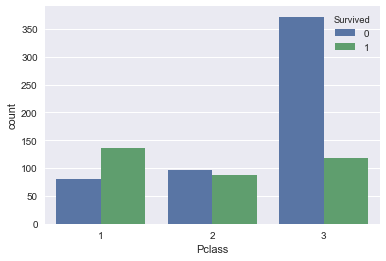

In [13]:
import seaborn as sns
%matplotlib inline
sns.countplot(x='Pclass', hue='Survived', data=dta_train)

Note that if you want this as a stacked bar chart... well, that's still hard.
Also note Quirk 1: Plots generated by matplotlib/seaborn need to be explicitly displayed. This is analagous to using print() to show results in the output pane. Ipyhon "magics" can take care of this in one fell swoop.